In [1]:
# to make this notebook's output stable across runs
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # silent warning for TF 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR 

# set up TensorFlow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [2]:
# Load a dataset mnist
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Build a machine learning model
# Don’t pass input_shape directly to a layer inside Sequential. Use tf.keras.Input(shape=...) instead.
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.13636173, -0.29310942, -0.61678976,  0.19670248,  0.22800222,
        -0.7182937 ,  0.26342967,  0.2518003 , -0.44397596, -0.06484565]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class:

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.11989481, 0.07803392, 0.05645609, 0.12735207, 0.1314012 ,
        0.05100682, 0.13613985, 0.1345658 , 0.06710624, 0.09804312]],
      dtype=float32)

Define a loss function for training using losses.SparseCategoricalCrossentropy:

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.975796

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
# Train and evaluate your model
# Use the Model.fit method to adjust your model parameters and minimize the loss:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9169 - loss: 0.2901
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9681 - loss: 0.1044
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0878
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0741


The Model.evaluate method checks the model's performance, usually on a validation set or test set.

In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9779 - loss: 0.0741


[0.07414154708385468, 0.9779000282287598]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.47760062e-08, 1.52532348e-10, 6.93509151e-07, 4.34733411e-05,
        2.18459663e-13, 1.93096632e-08, 2.53293785e-14, 9.99955058e-01,
        3.68866324e-08, 6.75922934e-07],
       [2.74168940e-07, 1.09784676e-04, 9.99839306e-01, 5.00326714e-05,
        1.17155276e-12, 4.31646328e-07, 5.11006171e-08, 5.10887478e-11,
        2.63170051e-07, 1.52589595e-12],
       [5.88666921e-07, 9.98951793e-01, 9.03917826e-05, 5.07866662e-06,
        3.46009620e-05, 1.25494046e-06, 6.11159885e-06, 7.27650593e-04,
        1.80421266e-04, 1.98763610e-06],
       [9.99980092e-01, 6.08665202e-11, 1.20821569e-05, 1.63689506e-07,
        6.91021240e-10, 9.66692184e-08, 1.81665200e-06, 5.60116041e-06,
        8.31339164e-11, 1.53689811e-07],
       [3.76381831e-05, 5.10255447e-08, 2.59717453e-05, 6.79753043e-07,
        9.94597673e-01, 5.28950886e-06, 6.59661328e-06, 2.53122445e-04,
        2.20134802e-06, 5.07073523e-03]], dtype=float32)>

Congratulations! You have trained a machine learning model using a prebuilt dataset using the Keras API.

In [13]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [15]:
# Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Build the tf.keras model using the Keras model subclassing API:

In [16]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [17]:
# Choose an optimizer and loss function for training:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [18]:
# Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [19]:
# Use tf.GradientTape to train the model:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [20]:
# Test the model
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [21]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_state()
  train_accuracy.reset_state()
  test_loss.reset_state()
  test_accuracy.reset_state()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result():0.2f}, '
    f'Accuracy: {train_accuracy.result() * 100:0.2f}, '
    f'Test Loss: {test_loss.result():0.2f}, '
    f'Test Accuracy: {test_accuracy.result() * 100:0.2f}'
  )

Epoch 1, Loss: 0.14, Accuracy: 95.77, Test Loss: 0.06, Test Accuracy: 98.16
Epoch 2, Loss: 0.04, Accuracy: 98.67, Test Loss: 0.06, Test Accuracy: 98.04
Epoch 3, Loss: 0.02, Accuracy: 99.26, Test Loss: 0.06, Test Accuracy: 98.25
Epoch 4, Loss: 0.01, Accuracy: 99.55, Test Loss: 0.07, Test Accuracy: 98.22
Epoch 5, Loss: 0.01, Accuracy: 99.72, Test Loss: 0.08, Test Accuracy: 98.03


Basic classification: Classify images of clothing
This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)
Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers,
ranging from 0 to 9. These correspond to the class of clothing the image represents:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers,
ranging from 0 to 9. These correspond to the class of clothing the image represents above.

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in 
the training set, with each image represented as 28 x 28 pixels:

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
len(test_labels)

10000

Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, 
you will see that the pixel values fall in the range of 0 to 255:

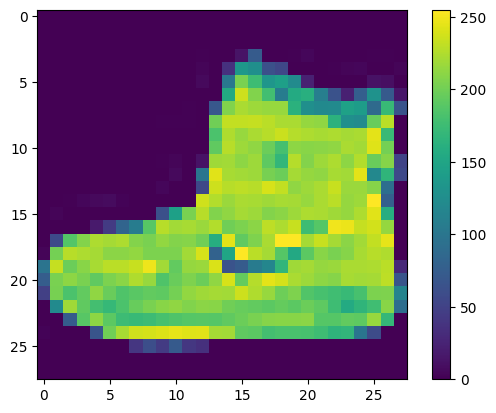

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide
the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [31]:
train_images = train_images / 255.0

test_images = test_images / 255.0

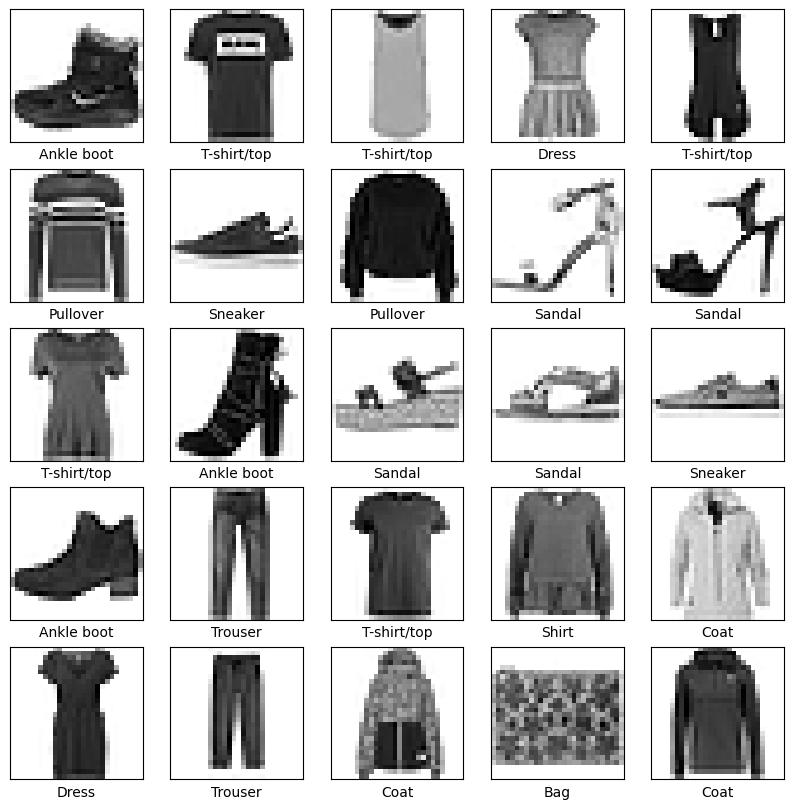

In [32]:
# To verify that the data is in the correct format and that you're ready to build and train the network,
# let's display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [33]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Optimizer — This is how the model is updated based on the data it sees and its loss function.
Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.
Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8096 - loss: 0.5356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8559 - loss: 0.4010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8652 - loss: 0.3697
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8734 - loss: 0.3479
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8791 - loss: 0.3298
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8818 - loss: 0.3190
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3081
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8899 - loss: 0.2979
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8914 - loss: 0.2911
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8921 - loss: 0.2844


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8823 - loss: 0.3352

Test accuracy: 0.8823000192642212


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

Demonstrate overfitting
Strategies to prevent overfitting
Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [37]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


In [38]:
predictions[0]

array([6.0080362e-07, 2.9891317e-10, 4.3855239e-09, 8.1011706e-08,
       9.1208555e-08, 5.4930057e-04, 3.4157461e-07, 1.3911095e-03,
       2.3790404e-08, 9.9805850e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [39]:
import numpy as np
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [40]:
test_labels[0]

9

In [41]:
# Define functions to graph the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

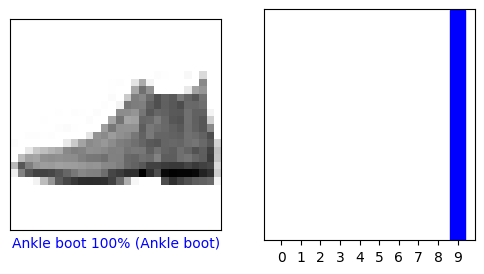

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

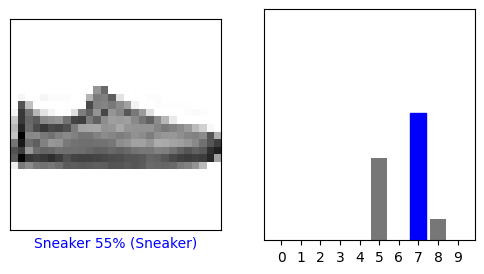

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

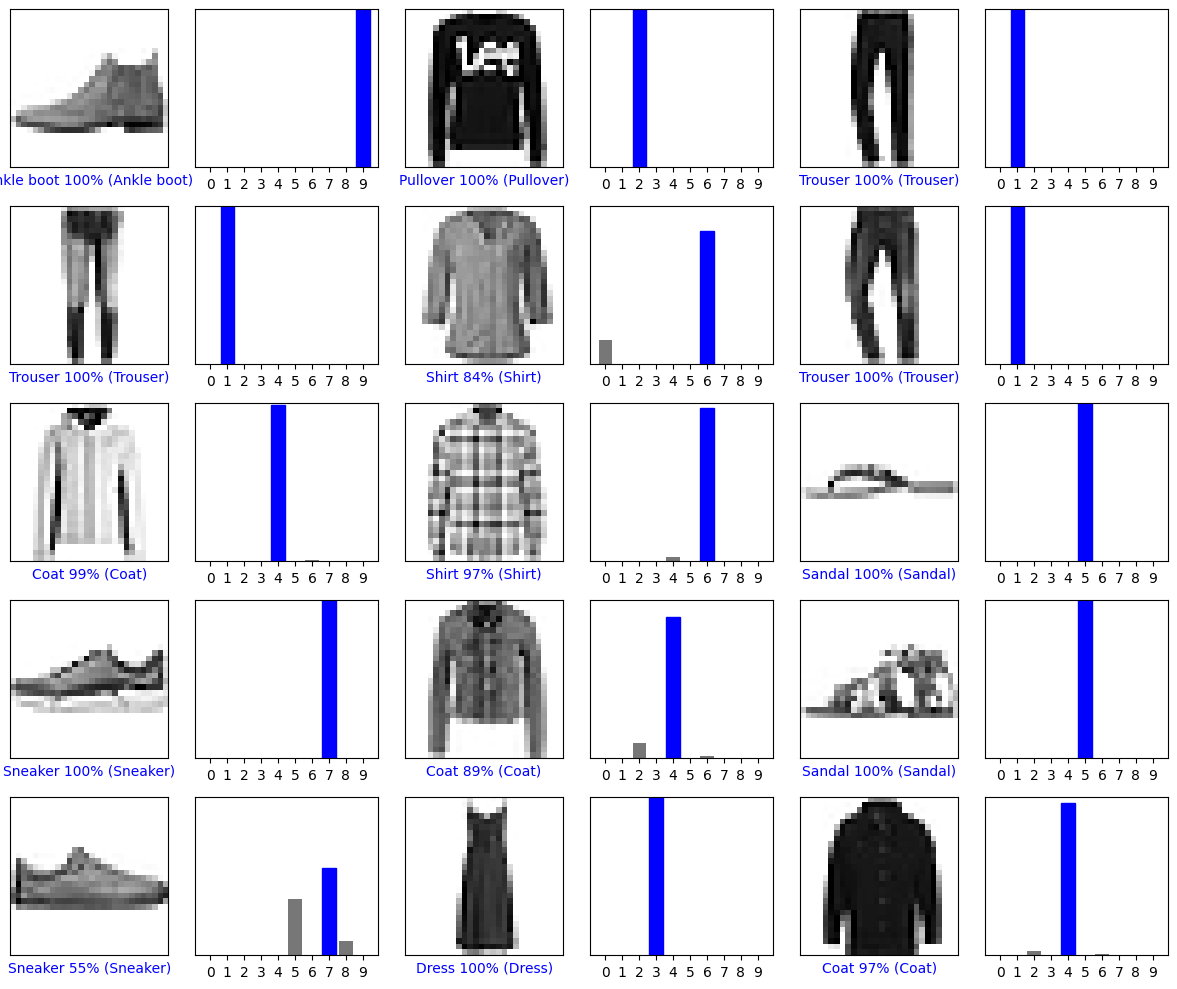

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [45]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [46]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.0625243e-05 6.5383049e-17 9.9934894e-01 5.1511794e-12 4.8965833e-04
  1.2856055e-14 1.5080840e-04 8.3585518e-21 8.6758899e-12 3.9478464e-22]]


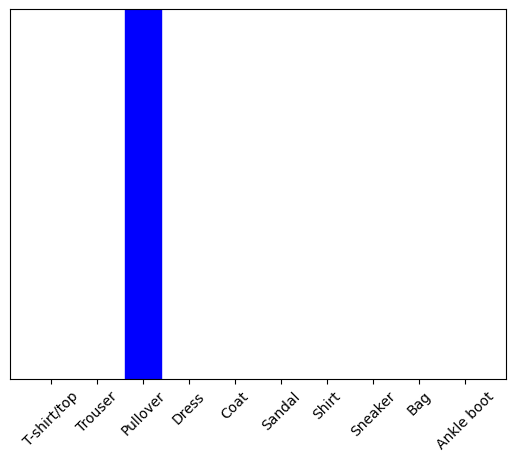

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [49]:
np.argmax(predictions_single[0])

2

Basic text classification
This tutorial demonstrates text classification starting from plain text files stored on disk. You'll train a binary classifier to perform sentiment analysis on an IMDB dataset. At the end of the notebook, there is an exercise for you to try, in which you'll train a multi-class classifier to predict the tag for a programming question on Stack Overflow.

In [50]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

Sentiment analysis
This notebook trains a sentiment analysis model to classify movie reviews as positive or negative, based on the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

You'll use the Large Movie Review Dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

Download and explore the IMDB dataset
Let's download and extract the dataset, then explore the directory structure.

In [51]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [52]:
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb_v1/aclImdb')

In [53]:
os.listdir(dataset_dir)

['test', 'imdb.vocab', 'train', 'imdbEr.txt', 'README']

In [54]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_pos.txt',
 'urls_unsup.txt',
 'urls_neg.txt',
 'pos',
 'neg',
 'unsup',
 'labeledBow.feat',
 'unsupBow.feat']

The aclImdb_v1/aclImdb/train/pos and aclImdb/train/neg directories contain many text files, each of which is a single movie review. Let's take a look at one of them.

In [55]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


Load the dataset
Next, you will load the data off disk and prepare it into a format suitable for training. To do so, you will use the helpful text_dataset_from_directory utility, which expects a directory structure as follows.
To prepare a dataset for binary classification, you will need two folders on disk, corresponding to class_a and class_b. These will be the positive and negative movie reviews, which can be found in aclImdb/train/pos and aclImdb/train/neg. As the IMDB dataset contains additional folders, you will remove them before using this utility.

In [56]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

Next, you will use the text_dataset_from_directory utility to create a labeled tf.data.Dataset. tf.data is a powerful collection of tools for working with data.

When running a machine learning experiment, it is a best practice to divide your dataset into three splits: train, validation, and test.

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the validation_split argument below.

In [57]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb_v1/aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


As you can see above, there are 25,000 examples in the training folder, of which you will use 80% (or 20,000) for training. As you will see in a moment, you can train a model by passing a dataset directly to model.fit. If you're new to tf.data, you can also iterate over the dataset and print out a few examples as follows.

In [58]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

Notice the reviews contain raw text (with punctuation and occasional HTML tags like <br/>). You will show how to handle these in the following section.

The labels are 0 or 1. To see which of these correspond to positive and negative movie reviews, you can check the class_names property on the dataset.

In [59]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


Next, you will create a validation and test dataset. You will use the remaining 5,000 reviews from the training set for validation.
Note: When using the validation_split and subset arguments, make sure to either specify a random seed, or to pass shuffle=False, so that the validation and training splits have no overlap.

In [60]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb_v1/aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [61]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb_v1/aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


Prepare the dataset for training
Next, you will standardize, tokenize, and vectorize the data using the helpful tf.keras.layers.TextVectorization layer.

Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace). Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

As you saw above, the reviews contain various HTML tags like <br />. These tags will not be removed by the default standardizer in the TextVectorization layer (which converts text to lowercase and strips punctuation by default, but doesn't strip HTML). You will write a custom standardization function to remove the HTML.

Note: To prevent training-testing skew (also known as training-serving skew), it is important to preprocess the data identically at train and test time. To facilitate this, the TextVectorization layer can be included directly inside your model, as shown later in this tutorial.

In [62]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

Next, you will create a TextVectorization layer. You will use this layer to standardize, tokenize, and vectorize our data. You set the output_mode to int to create unique integer indices for each token.

Note that you're using the default split function, and the custom standardization function you defined above. You'll also define some constants for the model, like an explicit maximum sequence_length, which will cause the layer to pad or truncate sequences to exactly sequence_length values.

In [63]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, you will call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

Note: It's important to only use your training data when calling adapt (using the test set would leak information).

In [64]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [65]:
# Create a function to see the result of using this layer to preprocess some data.
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

As you can see above, each token has been replaced by an integer. You can lookup the token (string) that each integer corresponds to by calling .get_vocabulary() on the layer.

In [66]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


You are nearly ready to train your model. As a final preprocessing step, you will apply the TextVectorization layer you created earlier to the train, validation, and test dataset.

In [67]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

Configure the dataset for performance
These are two important methods you should use when loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.

You can learn more about both methods, as well as how to cache data to disk in the data performance guide.

In [68]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the model
It's time to create your neural network:

In [69]:
embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

The layers are stacked sequentially to build the classifier:

The first layer is an Embedding layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding). To learn more about embeddings, check out the Word embeddings tutorial.
Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
The last layer is densely connected with a single output node.
Loss function and optimizer
A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), you'll use losses.BinaryCrossentropy loss function.

Now, configure the model to use an optimizer and a loss function:

In [70]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)])

Train the model
You will train the model by passing the dataset object to the fit method.

In [71]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - binary_accuracy: 0.6442 - loss: 0.6623 - val_binary_accuracy: 0.7328 - val_loss: 0.6114
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.7793 - loss: 0.5474 - val_binary_accuracy: 0.8108 - val_loss: 0.4968
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8332 - loss: 0.4452 - val_binary_accuracy: 0.8300 - val_loss: 0.4268
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8558 - loss: 0.3823 - val_binary_accuracy: 0.8382 - val_loss: 0.3873
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8712 - loss: 0.3404 - val_binary_accuracy: 0.8480 - val_loss: 0.3607
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8813 - loss: 0.3103 - val_binary_accuracy: 0.8478 - val_loss: 0.3476
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.8928 - loss: 0.2867 - val_binary_accuracy: 0.8558 - val_loss: 0.3323
Epoch 

Evaluate the model
Let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [72]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8551 - loss: 0.3319
Loss:  0.33189091086387634
Accuracy:  0.8551200032234192


This fairly naive approach achieves an accuracy of about 86%.

Create a plot of accuracy and loss over time
model.fit() returns a History object that contains a dictionary with everything that happened during training:

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

There are four entries: one for each monitored metric during training and validation. You can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

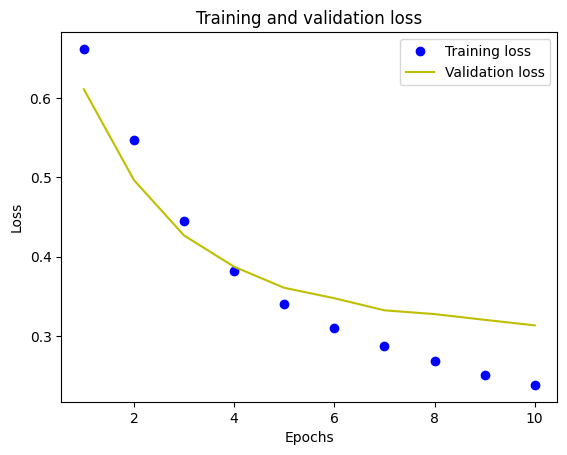

In [74]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

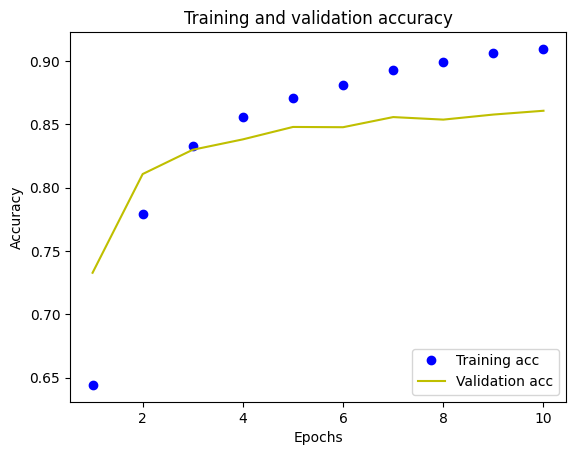

In [75]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss decreases with each epoch and the training accuracy increases with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak before the training accuracy. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

For this particular case, you could prevent overfitting by simply stopping the training when the validation accuracy is no longer increasing. One way to do so is to use the tf.keras.callbacks.EarlyStopping callback.

Export the model
In the code above, you applied the TextVectorization layer to the dataset before feeding text to the model. If you want to make your model capable of processing raw strings (for example, to simplify deploying it), you can include the TextVectorization layer inside your model. To do so, you can create a new model using the weights you just trained.

In [76]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
metrics = export_model.evaluate(raw_test_ds, return_dict=True)
print(metrics)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5000 - loss: 0.5885
{'accuracy': 0.5000399947166443, 'loss': 0.5885151028633118}


Inference on new data
To get predictions for new examples, you can simply call model.predict().

In [77]:
examples = tf.constant([
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
])

export_model.predict(examples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.5791361],
       [0.5453166],
       [0.5325657]], dtype=float32)

Including the text preprocessing logic inside your model enables you to export a model for production that simplifies deployment, and reduces the potential for train/test skew.

There is a performance difference to keep in mind when choosing where to apply your TextVectorization layer. Using it outside of your model enables you to do asynchronous CPU processing and buffering of your data when training on GPU. So, if you're training your model on the GPU, you probably want to go with this option to get the best performance while developing your model, then switch to including the TextVectorization layer inside your model when you're ready to prepare for deployment.

Visit this tutorial to learn more about saving models.

Exercise: multi-class classification on Stack Overflow questions
This tutorial showed how to train a binary classifier from scratch on the IMDB dataset. As an exercise, you can modify this notebook to train a multi-class classifier to predict the tag of a programming question on Stack Overflow.

A dataset has been prepared for you to use containing the body of several thousand programming questions (for example, "How can I sort a dictionary by value in Python?") posted to Stack Overflow. Each of these is labeled with exactly one tag (either Python, CSharp, JavaScript, or Java). Your task is to take a question as input, and predict the appropriate tag, in this case, Python.

The dataset you will work with contains several thousand questions extracted from the much larger public Stack Overflow dataset on BigQuery, which contains more than 17 million posts.

After downloading the dataset, you will find it has a similar directory structure to the IMDB dataset you worked with previously:

Note: To increase the difficulty of the classification problem, occurrences of the words Python, CSharp, JavaScript, or Java in the programming questions have been replaced with the word blank (as many questions contain the language they're about).

To complete this exercise, you should modify this notebook to work with the Stack Overflow dataset by making the following modifications:

At the top of your notebook, update the code that downloads the IMDB dataset with code to download the Stack Overflow dataset that has already been prepared. As the Stack Overflow dataset has a similar directory structure, you will not need to make many modifications.

Modify the last layer of your model to Dense(4), as there are now four output classes.

When compiling the model, change the loss to tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True). This is the correct loss function to use for a multi-class classification problem, when the labels for each class are integers (in this case, they can be 0, 1, 2, or 3). In addition, change the metrics to metrics=['accuracy'], since this is a multi-class classification problem (tf.metrics.BinaryAccuracy is only used for binary classifiers).

When plotting accuracy over time, change binary_accuracy and val_binary_accuracy to accuracy and val_accuracy, respectively.

Once these changes are complete, you will be able to train a multi-class classifier.

Learning more
This tutorial introduced text classification from scratch. To learn more about the text classification workflow in general, check out the Text classification guide from Google Developers.

Text classification with TensorFlow Hub: Movie reviews

This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

The tutorial demonstrates the basic application of transfer learning with TensorFlow Hub and Keras.

It uses the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow, and tensorflow_hub, a library for loading trained models from TFHub in a single line of code. For a more advanced text classification tutorial using tf.keras, see the MLCC Text Classification Guide.

In [103]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.20.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


Download the IMDB dataset
The IMDB dataset is available on imdb reviews or on TensorFlow datasets. The following code downloads the IMDB dataset to your machine (or the colab runtime):

In [79]:
# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Explore the data
Let's take a moment to understand the format of the data. Each example is a sentence representing the movie review and a corresponding label. The sentence is not preprocessed in any way. The label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

Let's print first 10 examples.

In [80]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [81]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

Build the model
The neural network is created by stacking layers—this requires three main architectural decisions:Build the model
The neural network is created by stacking layers—this requires three main architectural decisions:

How to represent the text?
How many layers to use in the model?
How many hidden units to use for each layer?
In this example, the input data consists of sentences. The labels to predict are either 0 or 1.

One way to represent the text is to convert sentences into embeddings vectors. Use a pre-trained text embedding as the first layer, which will have three advantages:

You don't have to worry about text preprocessing,
Benefit from transfer learning,
the embedding has a fixed size, so it's simpler to process.
For this example you use a pre-trained text embedding model from TensorFlow Hub called google/nnlm-en-dim50/2.

There are many other pre-trained text embeddings from TFHub that can be used in this tutorial:

google/nnlm-en-dim128/2 - trained with the same NNLM architecture on the same data as google/nnlm-en-dim50/2, but with a larger embedding dimension. Larger dimensional embeddings can improve on your task but it may take longer to train your model.
google/nnlm-en-dim128-with-normalization/2 - the same as google/nnlm-en-dim128/2, but with additional text normalization such as removing punctuation. This can help if the text in your task contains additional characters or punctuation.
google/universal-sentence-encoder/4 - a much larger model yielding 512 dimensional embeddings trained with a deep averaging network (DAN) encoder.
And many more! Find more text embedding models on TFHub.

Let's first create a Keras layer that uses a TensorFlow Hub model to embed the sentences, and try it out on a couple of input examples. Note that no matter the length of the input text, the output shape of the embeddings is: (num_examples, embedding_dimension).

How to represent the text?
How many layers to use in the model?
How many hidden units to use for each layer?
In this example, the input data consists of sentences. The labels to predict are either 0 or 1.

One way to represent the text is to convert sentences into embeddings vectors. Use a pre-trained text embedding as the first layer, which will have three advantages:

You don't have to worry about text preprocessing,
Benefit from transfer learning,
the embedding has a fixed size, so it's simpler to process.
For this example you use a pre-trained text embedding model from TensorFlow Hub called google/nnlm-en-dim50/2.

There are many other pre-trained text embeddings from TFHub that can be used in this tutorial:

google/nnlm-en-dim128/2 - trained with the same NNLM architecture on the same data as google/nnlm-en-dim50/2, but with a larger embedding dimension. Larger dimensional embeddings can improve on your task but it may take longer to train your model.
google/nnlm-en-dim128-with-normalization/2 - the same as google/nnlm-en-dim128/2, but with additional text normalization such as removing punctuation. This can help if the text in your task contains additional characters or punctuation.
google/universal-sentence-encoder/4 - a much larger model yielding 512 dimensional embeddings trained with a deep averaging network (DAN) encoder.
And many more! Find more text embedding models on TFHub.

Let's first create a Keras layer that uses a TensorFlow Hub model to embed the sentences, and try it out on a couple of input examples. Note that no matter the length of the input text, the output shape of the embeddings is: (num_examples, embedding_dimension).

In [82]:
import tensorflow as tf
import tensorflow_hub as hub
import keras

print(tf.__version__)
print(hub.__version__)
print(keras.__version__)

2.20.0
0.16.1
3.12.0


In [83]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2",
                           trainable=True)

model = tf.keras.Sequential([
    keras.layers.Lambda(lambda x: hub_layer(x)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

The layers are stacked sequentially to build the classifier:

The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The pre-trained text embedding model that you are using (google/nnlm-en-dim50/2) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: (num_examples, embedding_dimension). For this NNLM model, the embedding_dimension is 50.
This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
The last layer is densely connected with a single output node.
Let's compile the model.

Loss function and optimizer
A model needs a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs logits (a single-unit layer with a linear activation), you'll use the binary_crossentropy loss function.

This isn't the only choice for a loss function, you could, for instance, choose mean_squared_error. But, generally, binary_crossentropy is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions.

Later, when you are exploring regression problems (say, to predict the price of a house), you'll see how to use another loss function called mean squared error.

Now, configure the model to use an optimizer and a loss function:

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model
Train the model for 10 epochs in mini-batches of 512 samples. This is 10 iterations over all samples in the x_train and y_train tensors. While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:

In [85]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5031 - loss: 0.7035 - val_accuracy: 0.5115 - val_loss: 0.6849
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5273 - loss: 0.6734 - val_accuracy: 0.5310 - val_loss: 0.6596
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5579 - loss: 0.6492 - val_accuracy: 0.5783 - val_loss: 0.6370
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5987 - loss: 0.6268 - val_accuracy: 0.6315 - val_loss: 0.6150
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6325 - loss: 0.6056 - val_accuracy: 0.6611 - val_loss: 0.5947
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6595 - loss: 0.5859 - val_accuracy: 0.6693 - val_loss: 0.5752
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6775 - loss: 0.5685 - val_accuracy: 0.6897 - val_loss: 0.5601
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6950 - loss: 0.5550 - val_accuracy: 0.6996 - v

Evaluate the model
And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [86]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 1s - 22ms/step - accuracy: 0.7060 - loss: 0.5418
loss: 0.542
compile_metrics: 0.706


Basic regression: Predict fuel efficiency

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras tutorials and guides to learn more.)

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

The Auto MPG dataset
The dataset is available from the UCI Machine Learning Repository.

Get the data
First download and import the dataset using pandas:

In [88]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [89]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [90]:
# Clean the data
# The dataset contains a few unknown values:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [91]:
# Drop those rows to keep this initial tutorial simple:
dataset = dataset.dropna()

The "Origin" column is categorical, not numeric. So the next step is to one-hot encode the values in the column with pd.get_dummies.

Note: You can set up the tf.keras.Model to do this kind of transformation for you but that's beyond the scope of this tutorial. Check out the Classify structured data using Keras preprocessing layers or Load CSV data tutorials for examples.

In [92]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


Split the data into training and test sets
Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [93]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Inspect the data
Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. The other rows indicate they are functions of each other.

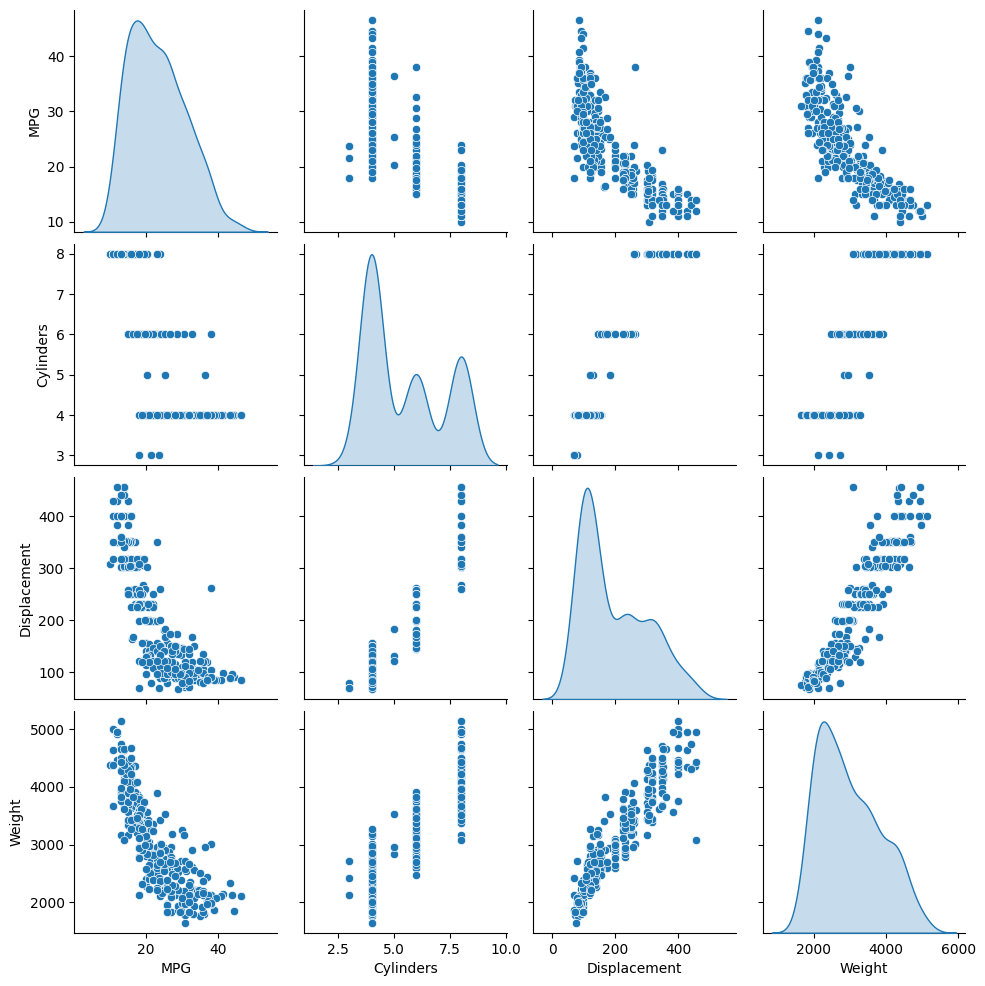

In [94]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [95]:
# then check the overall statistics. Note how each feature covers a very different range:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


Split features from labels
Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [96]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

Normalization
In the table of statistics it's easy to see how different the ranges of each feature are:

In [97]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the Working with preprocessing layers guide and the Classify structured data using Keras preprocessing layers tutorial.

The Normalization layer
The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

The Normalization layer
The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [98]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [99]:
# Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:
normalizer.adapt(np.array(train_features))

In [100]:
# Calculate the mean and variance, and store them in the layer:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [106]:
# When the layer is called, it returns the input data, with each feature independently normalized:
# eras 3.x changed how preprocessing layers accept inputs, and your normalizer(first) call is feeding it a Python
# scalar / NumPy scalar, which Keras now treats as an object, not a tensor.

first = np.array(train_features['Horsepower'][0])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: 130.0

Normalized: [[ 73.37  -0.63   0.66  -3.39  41.1   14.74 339.14 326.07 267.12]]


Linear regression
Before building a deep neural network model, start with linear regression using one and several variables.

Linear regression with one variable
Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'.

Training a model with tf.keras typically starts by defining the model architecture. Use a tf.keras.Sequential model, which represents a sequence of steps.

There are two steps in your single-variable linear regression model:

Normalize the 'Horsepower' input features using the tf.keras.layers.Normalization preprocessing layer.
Apply a linear transformation (
) to produce 1 output using a linear layer (tf.keras.layers.Dense).
The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First, create a NumPy array made of the 'Horsepower' features. Then, instantiate the tf.keras.layers.Normalization and fit its state to the horsepower data:

In [108]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[], axis=None)
horsepower_normalizer.adapt(horsepower)

In [109]:
# build the sequential model
horsepower_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),   # <-- required in Keras 3.x
    horsepower_normalizer,
    layers.Dense(1)
])

horsepower_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

This model will predict 'MPG' from 'Horsepower'.

Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of (10, 1):

In [110]:
horsepower_model.predict(horsepower[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ 0.412],
       [ 0.233],
       [-0.76 ],
       [ 0.577],
       [ 0.522],
       [ 0.205],
       [ 0.619],
       [ 0.522],
       [ 0.136],
       [ 0.233]], dtype=float32)

Once the model is built, configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam).

In [111]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [114]:
# Use Keras Model.fit to execute the training for 100 epochs:
# %%time
%timeit

history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [115]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.805176,4.198268,95
96,3.802657,4.186036,96
97,3.803858,4.181317,97
98,3.803271,4.194990,98
99,3.805617,4.187430,99


In [116]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

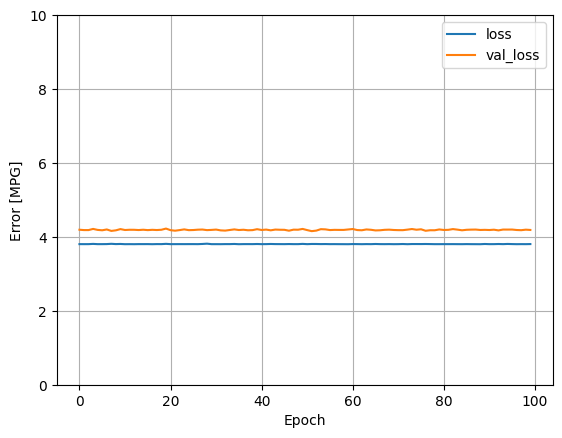

In [117]:
plot_loss(history)

In [118]:
# Collect the results on the test set for later:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [120]:
# Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:
x = tf.linspace(0.0, 250, 251, )
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


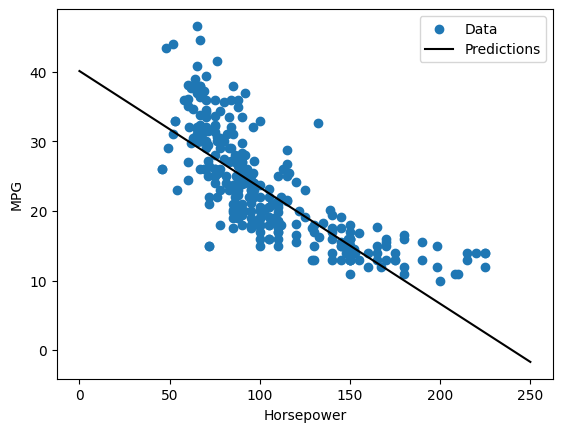

In [121]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

plot_horsepower(x, y)

Linear regression with multiple inputs
You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same 
 except that 
 is a matrix and 
 is a vector.

Create a two-step Keras Sequential model again with the first layer being normalizer (tf.keras.layers.Normalization(axis=-1)) you defined earlier and adapted to the whole dataset:

In [122]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [123]:
# When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[ 1.094],
       [ 1.185],
       [ 1.277],
       [-0.498],
       [-1.863],
       [ 0.756],
       [-1.823],
       [-0.223],
       [ 1.383],
       [-0.14 ]], dtype=float32)

In [124]:
# When you call the model, its weight matrices will be built—check that the kernel weights (the m in y = mx + b) have a shape of (9, 1):
linear_model.layers[1].kernel

<Variable path=sequential_8/dense_10/kernel, shape=(9, 1), dtype=float32, value=[[-0.613]
 [-0.148]
 [ 0.013]
 [ 0.641]
 [ 0.577]
 [-0.738]
 [-0.329]
 [-0.375]
 [ 0.745]]>

In [125]:
# Configure the model with Keras Model.compile and train with Model.fit for 100 epochs:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [126]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.63 s, sys: 2.05 s, total: 7.68 s
Wall time: 7.12 s


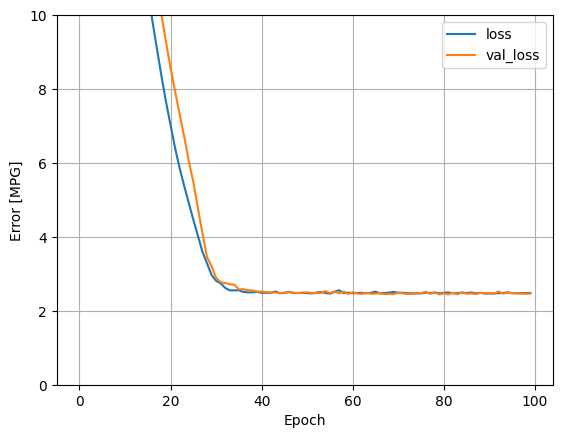

In [127]:
# Using all the inputs in this regression model achieves a much lower training and validation error than the horsepower_model, which had one input:
plot_loss(history)

In [128]:
# Collect the results on the test set for later:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Regression with a deep neural network (DNN)
In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

The normalization layer, as before (with horsepower_normalizer for a single-input model and normalizer for a multiple-input model).
Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
A linear Dense single-output layer.
Both models will use the same training procedure, so the compile method is included in the build_and_compile_model function below.

In [134]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        keras.layers.Input(shape=(1,)),   # <-- REQUIRED in Keras 3.x
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Regression using a DNN and a single input
Create a DNN model with only 'Horsepower' as input and horsepower_normalizer (defined earlier) as the normalization layer:

In [135]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [136]:
# This model has quite a few more trainable parameters than the linear models:
dnn_horsepower_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [138]:
# Train the model with Keras Model.fit:
%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4 μs, sys: 1e+03 ns, total: 5 μs
Wall time: 9.3 μs


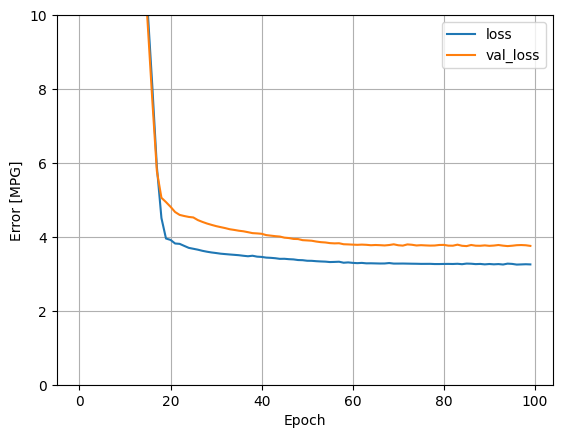

In [139]:
# This model does slightly better than the linear single-input horsepower_model:
plot_loss(history)

In [140]:
#  this model takes advantage of the nonlinearity provided by the hidden layers:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [141]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


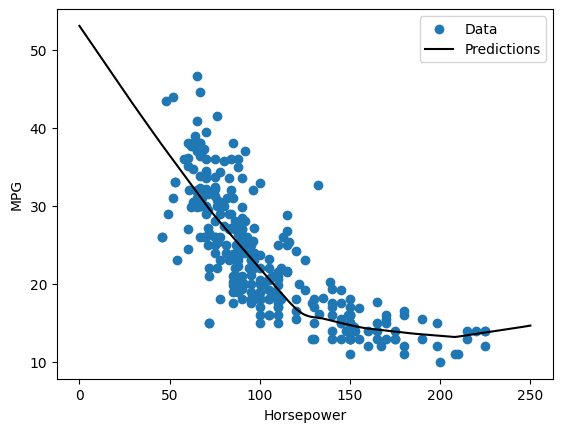

In [142]:
plot_horsepower(x, y)

In [143]:
# Collect the results on the test set for later:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

Regression using a DNN and multiple inputs
Repeat the previous process using all the inputs. The model's performance slightly improves on the validation dataset.

In [174]:
%%time

dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_features.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

CPU times: user 6.65 s, sys: 1.95 s, total: 8.6 s
Wall time: 7.92 s


In [175]:
dnn_model.build(input_shape=(None, train_features.shape[1]))
dnn_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597 (10.15 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,732 (6.77 KB)

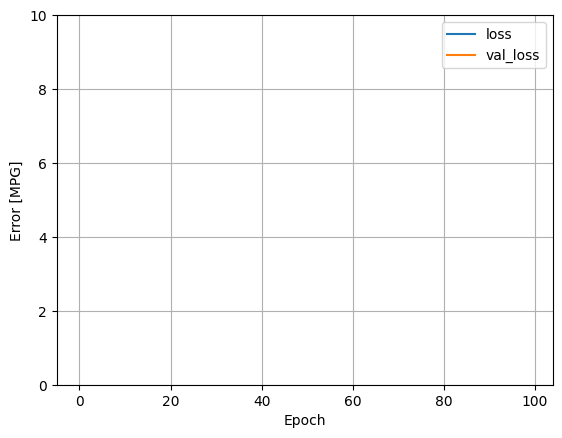

In [176]:
plot_loss(history)

In [177]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [197]:
test_results

{'horsepower_model': 3.6481730937957764,
 'linear_model': 2.4954655170440674,
 'dnn_horsepower_model': 2.9160120487213135,
 'dnn_model': [117.93370819091797, 9.565961837768555]}

Performance
Since all models have been trained, you can review their test set performance:

In [198]:
pd.DataFrame(
    test_results,
    index=['Loss (MSE)', 'Mean absolute error [MPG]']
).T

,Loss (MSE),Mean absolute error [MPG]
horsepower_model,3.648173,3.648173
linear_model,2.495466,2.495466
dnn_horsepower_model,2.916012,2.916012
dnn_model,117.933708,9.565962


Make predictions
You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


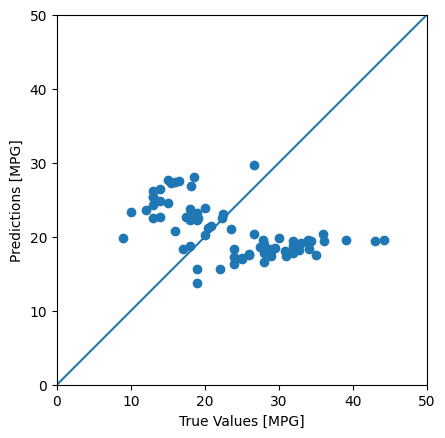

In [199]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

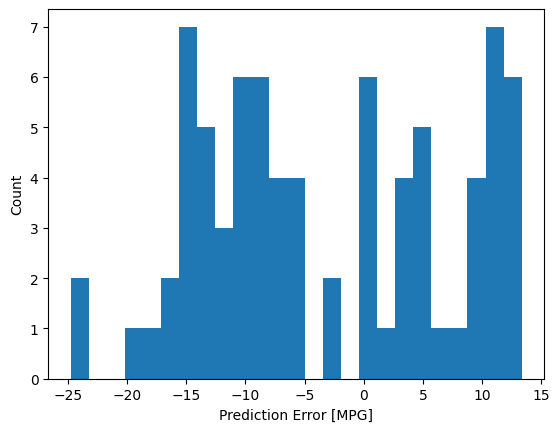

In [206]:
# Now, check the error distribution:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [207]:
# If you're happy with the model, save it for later use with Model.save:
dnn_model.save('output/09_neural_ntwk_deep_learning/dnn_model.keras')

In [208]:
# If you reload the model, it gives identical output:
reloaded = tf.keras.models.load_model('output/09_neural_ntwk_deep_learning/dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [213]:
test_results

{'horsepower_model': 3.6481730937957764,
 'linear_model': 2.4954655170440674,
 'dnn_horsepower_model': 2.9160120487213135,
 'dnn_model': [117.93370819091797, 9.565961837768555],
 'reloaded': [117.93370819091797, 9.565961837768555]}

In [215]:
test_results['reloaded']

[117.93370819091797, 9.565961837768555]

In [224]:
pd.DataFrame(test_results, index=['Loss (MSE)','Mean absolute error [MPG]']).T
# pd.DataFrame(test_results['reloaded'], index=['mse', 'mpg'])
# pd.DataFrame(test_results, index=['MSE', 'MPG']).T

,Loss (MSE),Mean absolute error [MPG]
horsepower_model,3.648173,3.648173
linear_model,2.495466,2.495466
dnn_horsepower_model,2.916012,2.916012
dnn_model,117.933708,9.565962
reloaded,117.933708,9.565962


Conclusion
This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

Mean squared error (MSE) (tf.keras.losses.MeanSquaredError) and mean absolute error (MAE) (tf.keras.losses.MeanAbsoluteError) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
Similarly, evaluation metrics used for regression differ from classification.
When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. Visit the Overfit and underfit tutorial for more help with this.